In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
pd.options.display.float_format = '{:,.0f}'.format
%matplotlib inline

In [2]:
data = []
for yr in range(2009,2019):
    path = 'C:/Users/PC/Downloads/' + str(yr) + '/*.xlsx'
    files = glob.glob(path)
    for f in files:
        dt = pd.read_excel(f)
        colnames = list(dt.iloc[15])
        dt = dt.iloc[16:]
        dt.columns = colnames
        data.append(dt)
    print('Year : {}... Done.'.format(yr))
print('--Done--')
df = pd.concat(data)

--Done--


In [3]:
###### 데이터 입력
df = pd.concat(data)
print(df.columns)

###### 전처리
# 열 추가
df['시'] = df['시군구'].str.split(' ').str.get(0)
df['구'] = df['시군구'].str.split(' ').str.get(1)
df['동'] = df['시군구'].str.split(' ').str.get(2)
df['계약년도'] = df['계약년월'].astype(str).str.extract('(\d{4})(\d{2})', expand=False)[0].astype(int)
df['계약월'] = df['계약년월'].astype(str).str.extract('(\d+)(\d+)', expand=False)[1].astype(int)
df['계약일'] = (df['계약일'].astype(str).str.extract('(\d+)~(\d+)', expand=False).astype(int)[0]+df['계약일'].astype(str).str.extract('(\d+)~(\d+)', expand=False).astype(int)[1])/2

# 형 변환
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','').astype(float)
#df['층'] = df['층'].astype('np.int64')


# 열 삭제
df = df.drop(['시군구','지번','계약년월','지분구분'], axis=1)

# 열 이름 변환
df.columns = ['type','street','usage_area','main_usage','road','area','land_area','price','floor','contract_d','yoc','si','gu','dong','contract_y','contract_m']
df = df[['type','street','usage_area','main_usage','road','area','land_area','price','floor','yoc','si','gu','dong','contract_y','contract_m','contract_d']]
df.head()

# 형 변환
df['area'] = df['area'].astype(float)

# 열 추가
df['price_per_area'] = df['price'] / df['area']

Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
       '대지면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일', '지분구분', '건축년도'],
      dtype='object')


In [5]:
# Outlier(1개) 처리
df = df.loc[np.log(df['price']) < 20]
df = df.reset_index().drop('index', axis=1)

In [6]:
# 서울특별시 필터링
df = df.query('si == "서울특별시"')
len(df)

136986

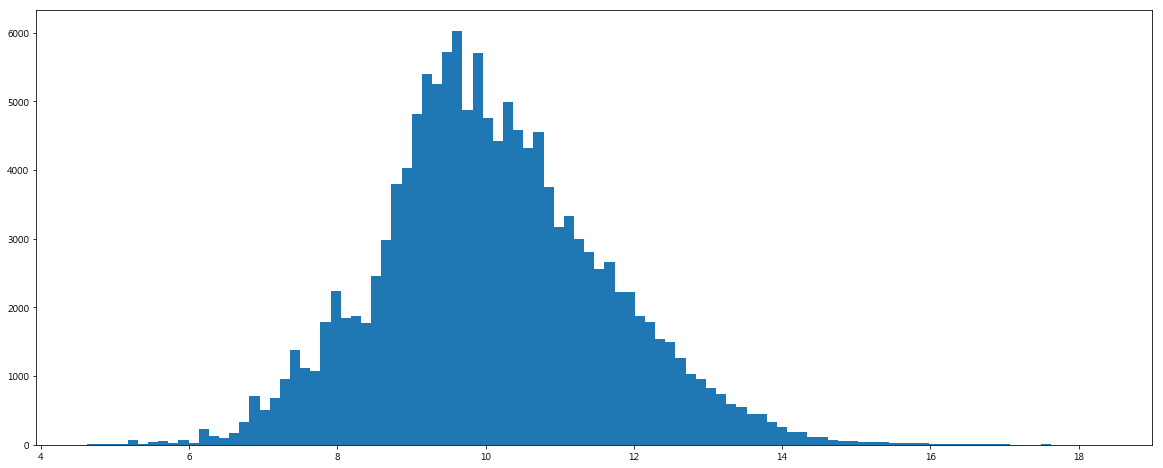

In [7]:
# 거래금액 분포
plt.figure(figsize=(20,8))
plt.hist(np.log(df['price']), bins=100)
plt.show()

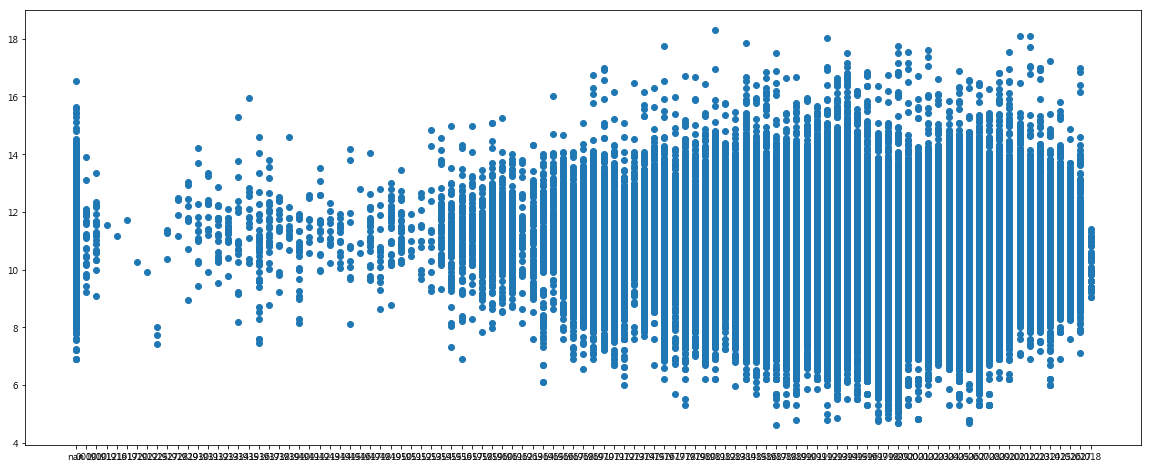

In [8]:
# 건축년도 별 거래금액
plt.figure(figsize=(20,8))
plt.scatter(df['yoc'], np.log(df['price']))
plt.show()

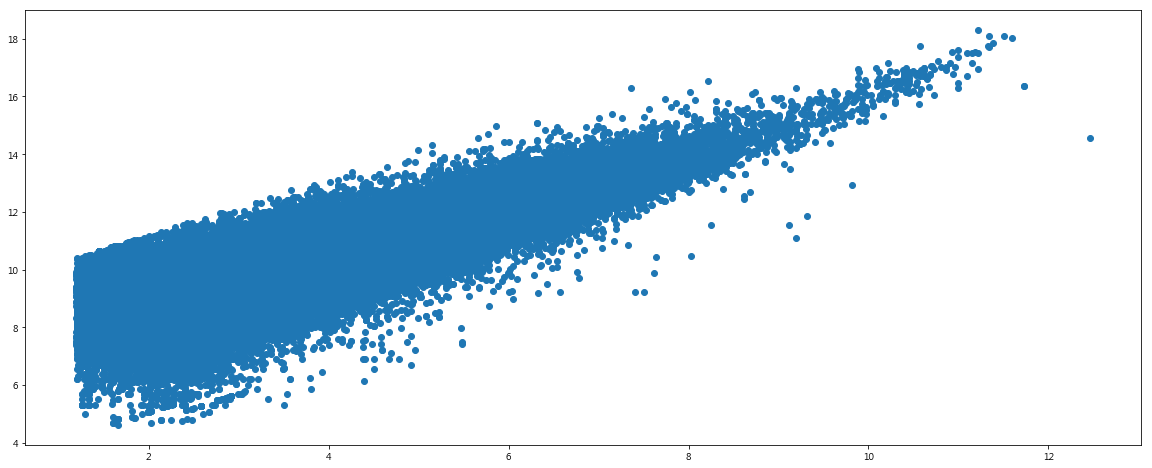

In [9]:
# 면적당 거래금액
plt.figure(figsize=(20,8))
plt.scatter(np.log(df['area']), np.log(df['price']))
plt.show()

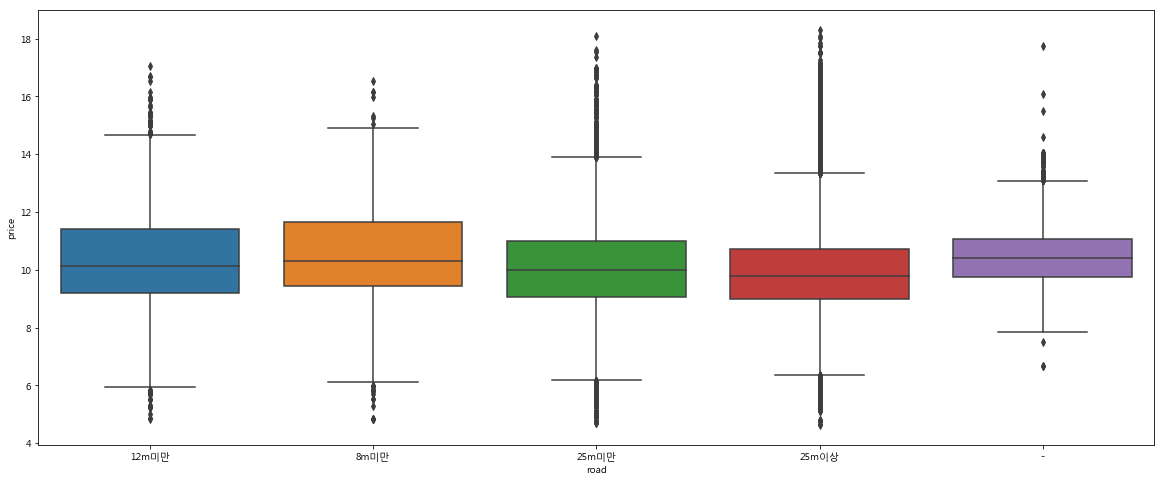

In [10]:
# 도로조건별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='road', y=np.log(df['price']), data=df)
plt.show()

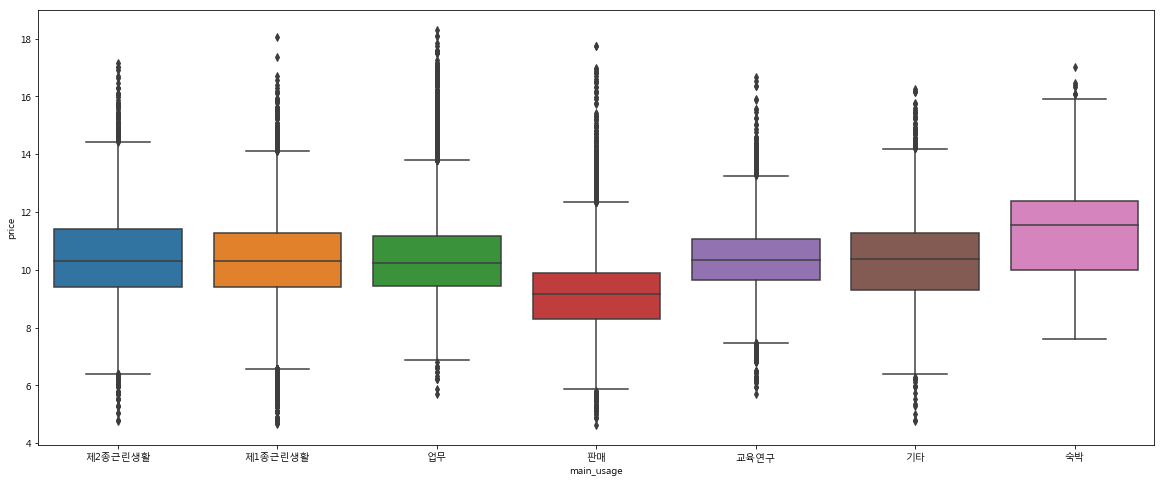

In [11]:
# 건물주용도별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='main_usage', y=np.log(df['price']), data=df)
plt.show()

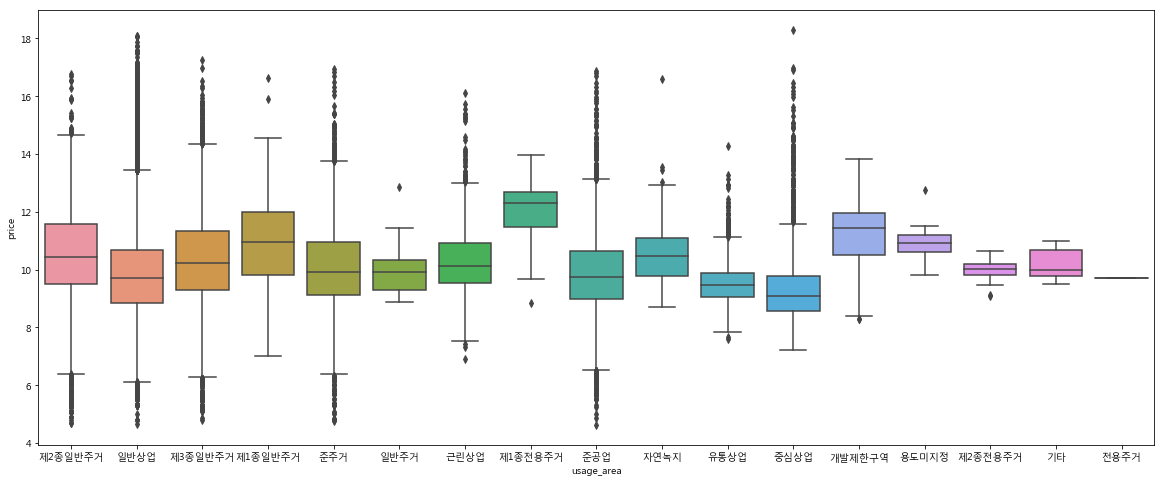

In [12]:
# 용도지역별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='usage_area', y=np.log(df['price']), data=df)
plt.show()

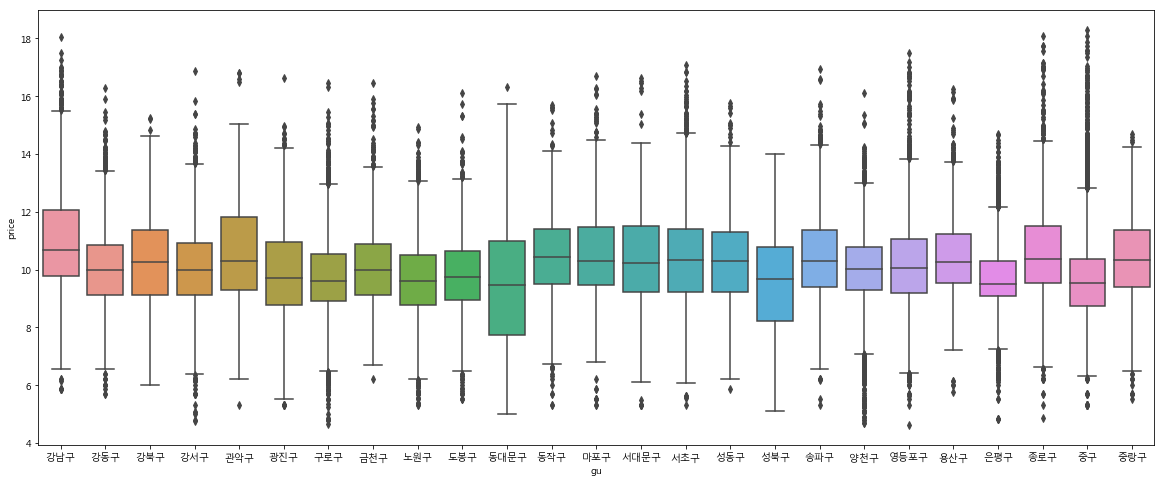

In [13]:
# 구별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='gu', y=np.log(df['price']), data=df)
plt.show()

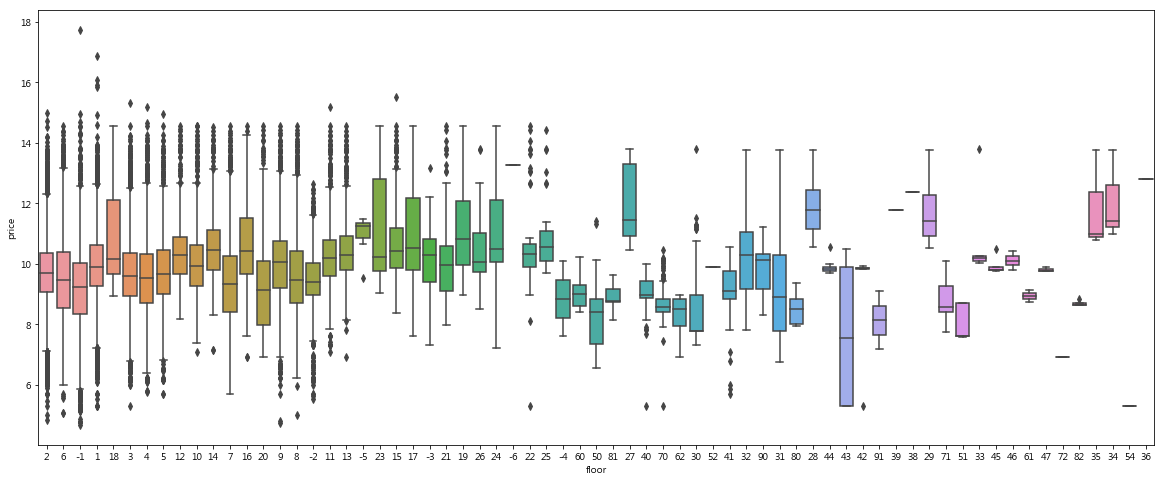

In [14]:
# 층별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(df.loc[df['floor']!=' ',:]['floor'], np.log(df.loc[df['floor']!=' ',:]['price']))
plt.show()

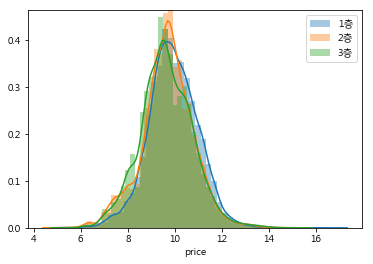

1층 평균 거래금액 : 38,199.4천원
2층 평균 거래금액 : 30,732.0천원
3층 평균 거래금액 : 31,604.6천원


In [15]:
# 1, 2, 3층 가격 분포
sns.distplot(np.log(df.loc[df['floor'] == '1','price']), label='1층')
sns.distplot(np.log(df.loc[df['floor'] == '2','price']), label='2층')
sns.distplot(np.log(df.loc[df['floor'] == '3','price']), label='3층')
plt.legend()
plt.show()

print('1층 평균 거래금액 : {:,.6}천원'.format(np.mean(df.loc[df['floor'] == '1','price'])))
print('2층 평균 거래금액 : {:,.6}천원'.format(np.mean(df.loc[df['floor'] == '2','price'])))
print('3층 평균 거래금액 : {:,.6}천원'.format(np.mean(df.loc[df['floor'] == '3','price'])))

평당 평균 가격 : 827.496천원


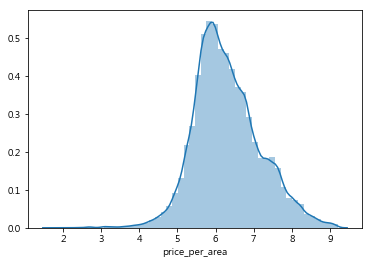

In [16]:
# 평당 평균 가격
sns.distplot(np.log(df['price_per_area']))
print('평당 평균 가격 : {:,.6}천원'.format(np.mean(df['price_per_area'])))
plt.show()

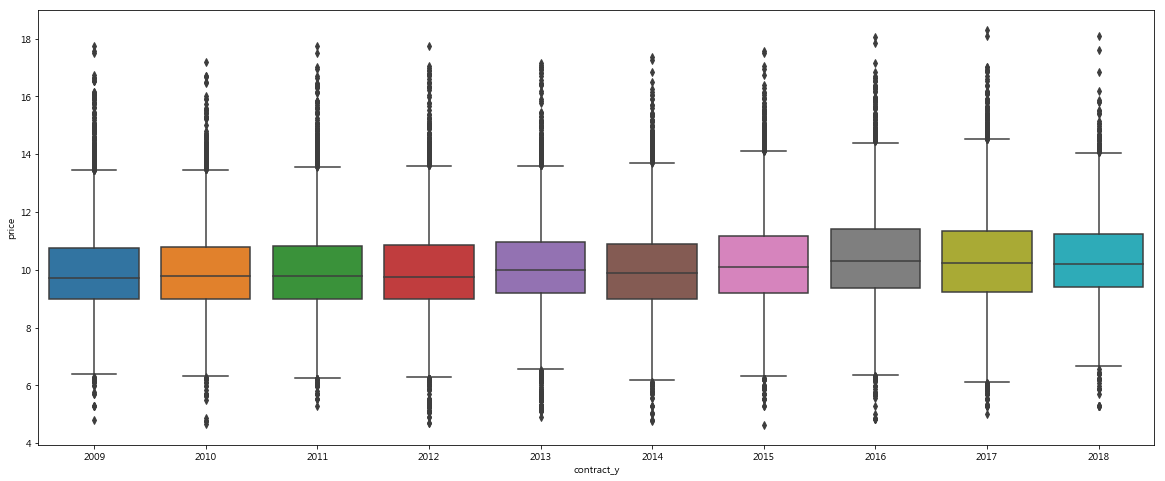

In [17]:
# 거래시점별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='contract_y', y=np.log(df['price']), data=df)
plt.show()

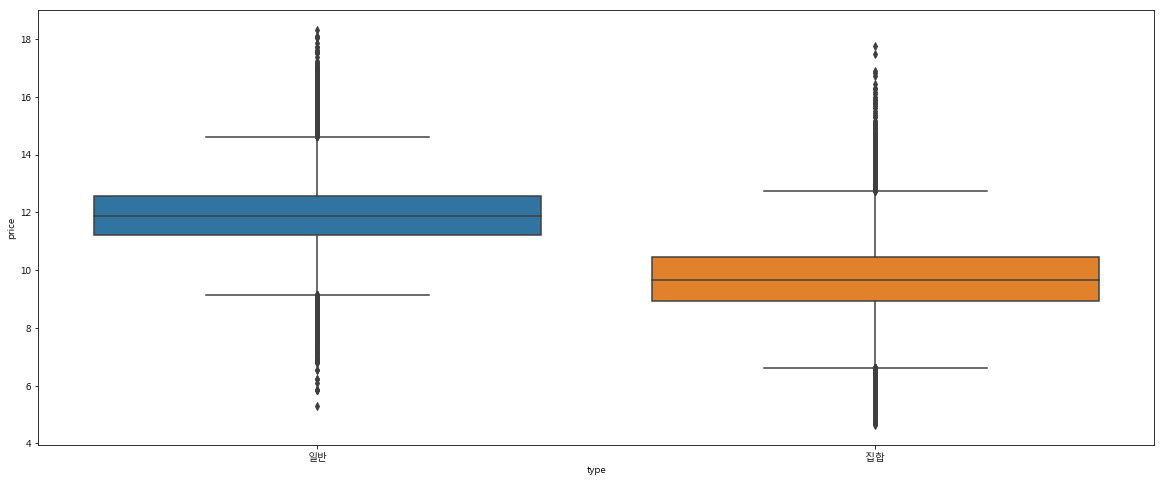

In [18]:
# 유형별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='type', y=np.log(df['price']), data=df)
plt.show()

In [ ]:
# 영등포구
df_ydp = df.query('gu == "영등포구"')
df_ydp.head()

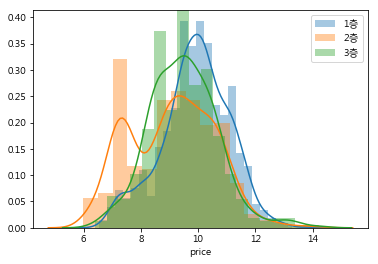

1층 평균 거래금액 : 37,654.6만원
2층 평균 거래금액 : 26,232.2만원
3층 평균 거래금액 : 33,614.4만원


In [41]:
# 1, 2, 3층 가격 분포
sns.distplot(np.log(df_ydp.loc[df_ydp['floor'] == '1','price']), label='1층')
sns.distplot(np.log(df_ydp.loc[df_ydp['floor'] == '2','price']), label='2층')
sns.distplot(np.log(df_ydp.loc[df_ydp['floor'] == '3','price']), label='3층')
plt.legend()
plt.show()

print('1층 평균 거래금액 : {:,.6}만원'.format(np.mean(df_ydp.loc[df_ydp['floor'] == '1','price'])))
print('2층 평균 거래금액 : {:,.6}만원'.format(np.mean(df_ydp.loc[df_ydp['floor'] == '2','price'])))
print('3층 평균 거래금액 : {:,.6}만원'.format(np.mean(df_ydp.loc[df_ydp['floor'] == '3','price'])))

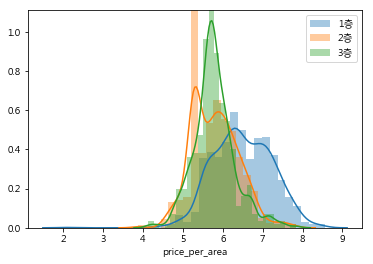

1층 평균 평당 거래금액 : 857.7만원
2층 평균 평당 거래금액 : 396.1만원
3층 평균 평당 거래금액 : 379.6만원


In [42]:
# 영등포구 1, 2, 3층 평당 가격 분포
sns.distplot(np.log(df_ydp.loc[df_ydp['floor'] == '1','price_per_area']), label='1층')
sns.distplot(np.log(df_ydp.loc[df_ydp['floor'] == '2','price_per_area']), label='2층')
sns.distplot(np.log(df_ydp.loc[df_ydp['floor'] == '3','price_per_area']), label='3층')
plt.legend()
plt.show()

print('1층 평균 평당 거래금액 : {:,.4}만원'.format(np.mean(df_ydp.loc[df_ydp['floor'] == '1','price_per_area'])))
print('2층 평균 평당 거래금액 : {:,.4}만원'.format(np.mean(df_ydp.loc[df_ydp['floor'] == '2','price_per_area'])))
print('3층 평균 평당 거래금액 : {:,.4}만원'.format(np.mean(df_ydp.loc[df_ydp['floor'] == '3','price_per_area'])))

In [92]:
# 대림동
df_dr = df_ydp.query('dong == "대림동"')
df_dr.sort_values(by='price_per_area', ascending=False)

,type,street,usage_area,main_usage,road,area,land_area,price,floor,yoc,si,gu,dong,contract_y,contract_m,contract_d,price_per_area
642683,일반,디지털로74길,제2종일반주거,제1종근린생활,8m미만,46,152.00,"79,423",NaN,1992,서울특별시,영등포구,대림동,2016,2,26,"1,724"
715417,집합,도신로,준공업,제1종근린생활,25m이상,7,,"11,100",1,1997,서울특별시,영등포구,대림동,2017,9,6,"1,586"
672724,집합,대림로29길,제2종일반주거,판매,12m미만,48,,"75,000",NaN,2013,서울특별시,영등포구,대림동,2017,4,16,"1,553"
372302,집합,도림로31길,준주거,제2종근린생활,8m미만,47,,"71,000",1,2004,서울특별시,영등포구,대림동,2014,2,16,"1,503"
400874,집합,대림로29길,제2종일반주거,판매,12m미만,46,,"63,650",1,2013,서울특별시,영등포구,대림동,2014,8,26,"1,398"
429960,집합,대림로29길,제2종일반주거,판매,12m미만,48,,"61,320",1,2013,서울특별시,영등포구,대림동,2014,4,6,"1,288"
365747,집합,대림로29길,제2종일반주거,판매,12m미만,52,,"66,170",1,2013,서울특별시,영등포구,대림동,2014,1,6,"1,279"
461102,집합,대림로29길,제2종일반주거,판매,12m미만,57,,"68,630",1,2013,서울특별시,영등포구,대림동,2015,2,16,"1,213"
127730,집합,도림로31길,준주거,제2종근린생활,8m미만,35,,"42,000",1,2004,서울특별시,영등포구,대림동,2010,1,16,"1,212"
302179,집합,대림로29길,제2종일반주거,판매,12m미만,54,,"64,790",1,2013,서울특별시,영등포구,대림동,2013,7,26,"1,204"


In [83]:
# 평당 3천만원 이상 거래 내역
df_ydp.query('price_per_area > 3000').sort_values(by='price_per_area', ascending=False)

,type,street,usage_area,main_usage,road,area,land_area,price,floor,yoc,si,gu,dong,contract_y,contract_m,contract_d,price_per_area
422602,일반,영등포로,일반상업,제1종근린생활,25m이상,12,78.33,"74,668",NaN,1967,서울특별시,영등포구,영등포동2가,2014,5,26,"6,454"
722197,집합,-,준주거,제1종근린생활,25m이상,28,,"169,000",NaN,1959,서울특별시,영등포구,영등포동1가,2017,0,16,"6,004"
79504,집합,국제금융로2길,일반상업,제1종근린생활,25m이상,67,,"362,668",NaN,2009,서울특별시,영등포구,여의도동,2010,2,16,"5,428"
715462,집합,-,일반상업,제1종근린생활,25m이상,28,,"148,000",1,2009,서울특별시,영등포구,여의도동,2017,9,26,"5,197"
109141,집합,여의대방로,제3종일반주거,제2종근린생활,25m이상,16,,"80,000",1,1975,서울특별시,영등포구,여의도동,2010,5,26,"5,041"
207639,집합,국제금융로2길,일반상업,제1종근린생활,25m이상,57,,"261,515",1,2009,서울특별시,영등포구,여의도동,2011,2,26,"4,592"
706775,일반,-,제2종일반주거,제2종근린생활,25m이상,62,441.00,"280,000",NaN,2004,서울특별시,영등포구,신길동,2017,8,26,"4,480"
698372,일반,여의대방로,제3종일반주거,제1종근린생활,25m이상,43,207.80,"187,000",NaN,1959,서울특별시,영등포구,신길동,2017,7,26,"4,351"
715453,집합,여의대방로,제3종일반주거,판매,25m이상,32,,"138,000",1,1975,서울특별시,영등포구,여의도동,2017,9,16,"4,348"
755752,집합,여의나루로,일반상업,제2종근린생활,25m이상,21,,"90,000",1,1976,서울특별시,영등포구,여의도동,2018,3,26,"4,280"
